In [1]:

# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the data from Results_VendingMachine.csv into a pandas dataframe
df = pd.read_csv('Results_VendingMachine.csv', sep=';', header=None, names=['Product', 'Approach', 'NSeq', 'Time', 'TransitionCoverage', 'StateCoverage', 'AvgLen', 'NExec'])

# Group the data by the product and approach, and use for the other fields the average value
df_grouped = df
df_grouped = df_grouped.groupby(['Product', 'Approach']).mean().reset_index()

# Update the names of the approaches
df_grouped['Approach'] = df_grouped['Approach'].replace(['ONLY_CONSTRAINT', 'STANDARD_CIT'], ['CT4SPL', 'StandardCT'])
df['Approach'] = df['Approach'].replace(['ONLY_CONSTRAINT', 'STANDARD_CIT'], ['CT4SPL', 'StandardCT'])

In [3]:
# Summary data
df_grouped_summary = df.groupby(['Product', 'Approach']).mean().reset_index()
print(df_grouped_summary)

    Product    Approach  NSeq    Time  TransitionCoverage  StateCoverage  \
0         1      CT4SPL   3.8  0.0548          100.000000      100.00000   
1         1  StandardCT  15.0  1.2150           14.285715       28.57143   
2         2      CT4SPL   3.8  0.1080          100.000000      100.00000   
3         2  StandardCT  15.0  1.2150            0.000000        0.00000   
4         3      CT4SPL   4.0  0.1622          100.000000      100.00000   
5         3  StandardCT  15.0  1.2150           50.000000       80.00000   
6         4      CT4SPL   7.0  0.2746          100.000000      100.00000   
7         4  StandardCT  15.0  1.2150            0.000000        0.00000   
8         5      CT4SPL   2.0  0.3176          100.000000      100.00000   
9         5  StandardCT  15.0  1.2150            0.000000        0.00000   
10        6      CT4SPL   8.0  0.4128          100.000000      100.00000   
11        6  StandardCT  15.0  1.2150           11.111112       25.00000   

    AvgLen 

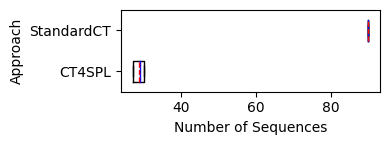

In [4]:
# Show a boxplot of the NSeq per Approach
ax = df.groupby(['Approach','NExec']).sum().reset_index().boxplot(column='NSeq', by='Approach', vert=False, grid=False, widths=0.5, showfliers=False, 
                showmeans=True, meanline=True, meanprops={'color':'red', 'linewidth':1}, 
                medianprops={'color':'blue', 'linewidth':1}, whiskerprops={'color':'black', 'linewidth':1}, 
                capprops={'color':'black', 'linewidth':1},
                boxprops={'color':'black', 'linewidth':1})
ax.set_ylabel('Approach')
ax.set_xlabel('Number of Sequences')
ax.set_title('')
plt.yticks(rotation=0)
plt.suptitle('')
fig = plt.gcf()
fig.set_size_inches(4, 1.7)
plt.tight_layout()
plt.savefig("pictures/NSeq.pdf", bbox_inches='tight')

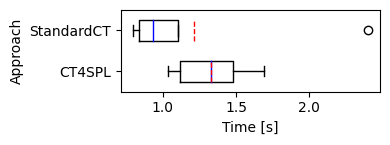

In [5]:
# Create a new dataframe with only the rows where the Approach is CT4SPL
dfNew = df[df['Approach'] == 'CT4SPL']
dfNew = dfNew.groupby(['NExec', 'Approach']).sum().reset_index()

# Create a new dataframe with only the rows where the Approach is StandardCT
dfNew2 = df[df['Approach'] == 'StandardCT']
dfNew2 = dfNew2.groupby(['NExec', 'Approach']).mean().reset_index()

# Concatenate dfNew and dfNew2
dfNew = pd.concat([dfNew, dfNew2])

# Show a boxplot of the Time per Approach
ax = dfNew.boxplot(column='Time', by='Approach', vert=False, grid=False, widths=0.5, showfliers=True, 
                showmeans=True, meanline=True, meanprops={'color':'red', 'linewidth':1}, 
                medianprops={'color':'blue', 'linewidth':1}, whiskerprops={'color':'black', 'linewidth':1}, 
                capprops={'color':'black', 'linewidth':1},
                boxprops={'color':'black', 'linewidth':1})
ax.set_ylabel('Approach')
ax.set_xlabel('Time [s]')
ax.set_title('')
plt.yticks(rotation=0)
plt.suptitle('')
fig = plt.gcf()
fig.set_size_inches(4, 1.7)
plt.tight_layout()
plt.savefig("pictures/Time.pdf", bbox_inches='tight')

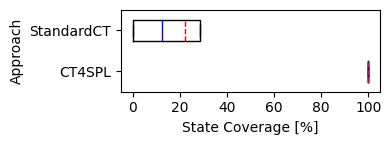

In [6]:
# Show a boxplot of the StateCoverage per Approach
ax = df.boxplot(column='StateCoverage', by='Approach', vert=False, grid=False, widths=0.5, showfliers=False, 
                showmeans=True, meanline=True, meanprops={'color':'red', 'linewidth':1}, 
                medianprops={'color':'blue', 'linewidth':1}, whiskerprops={'color':'black', 'linewidth':1}, 
                capprops={'color':'black', 'linewidth':1},
                boxprops={'color':'black', 'linewidth':1})
ax.set_ylabel('Approach')
ax.set_xlabel('State Coverage [%]')
ax.set_title('')
plt.yticks(rotation=0)
plt.suptitle('')
fig = plt.gcf()
fig.set_size_inches(4, 1.7)
plt.tight_layout()
plt.savefig("pictures/StateCoverage.pdf", bbox_inches='tight')

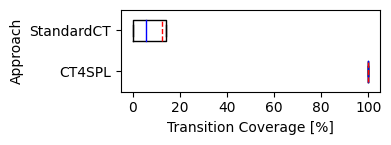

In [7]:
# Show a boxplot of the TransitionCoverage per Approach
ax = df.boxplot(column='TransitionCoverage', by='Approach', vert=False, grid=False, widths=0.5, showfliers=False, 
                showmeans=True, meanline=True, meanprops={'color':'red', 'linewidth':1}, 
                medianprops={'color':'blue', 'linewidth':1}, whiskerprops={'color':'black', 'linewidth':1}, 
                capprops={'color':'black', 'linewidth':1},
                boxprops={'color':'black', 'linewidth':1})
ax.set_ylabel('Approach')
ax.set_xlabel('Transition Coverage [%]')
ax.set_title('')
plt.yticks(rotation=0)
plt.suptitle('')
fig = plt.gcf()
fig.set_size_inches(4, 1.7)
plt.tight_layout()
plt.savefig("pictures/TransitionCoverage.pdf", bbox_inches='tight')

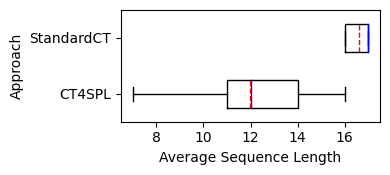

In [8]:
# Show a boxplot of the AvgLen per Approach
ax = df.boxplot(column='AvgLen', by='Approach', vert=False, grid=False, widths=0.5, showfliers=False, 
                showmeans=True, meanline=True, meanprops={'color':'red', 'linewidth':1}, 
                medianprops={'color':'blue', 'linewidth':1}, whiskerprops={'color':'black', 'linewidth':1}, 
                capprops={'color':'black', 'linewidth':1},
                boxprops={'color':'black', 'linewidth':1})
ax.set_ylabel('Approach')
ax.set_xlabel('Average Sequence Length')
ax.set_title('')
plt.yticks(rotation=0)
plt.suptitle('')
fig = plt.gcf()
fig.set_size_inches(4, 1.7)
plt.tight_layout()
plt.savefig("pictures/AvgLen.pdf", bbox_inches='tight')